In [ ]:
from google.colab import drive
drive.mount('/content/drive')

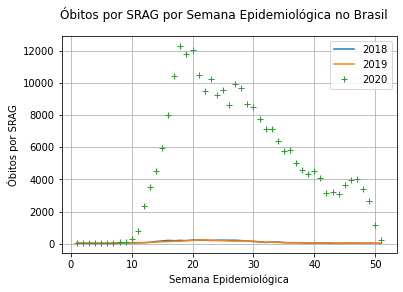

In [24]:
#MORTES POR COVID SUBNOTIFICADAS EM 03/012020

import pandas
import numpy as np
import matplotlib.pyplot as plt

'''
PARTE 1: Visualizar os dados dos óbitos por SRAG disponíveis em :
    https://bigdata-covid19.icict.fiocruz.br/ (em 16/05/2020)
'''

#define labels
colnames = ['semana_epidemiologica', 'ano_2018', 'ano_2019', 'ano_2020']

#import CSV file
data = pandas.read_csv('/content/drive/MyDrive/Colab Notebooks/covid19_second_wave/srag_deaths_brazil.csv', names=colnames, delimiter=';')

#append the data to pyhton lists
semana_epidemiologica = data.semana_epidemiologica.tolist()
casos_2018 = data.ano_2018.tolist()
casos_2019 = data.ano_2019.tolist()
casos_2020 = data.ano_2020.tolist()

#Delete the last row because we dont have the 2020 value to the week number 51
del semana_epidemiologica[-1]
del casos_2018[-1]
del casos_2019[-1]
del casos_2020[-1]

#make some graphs
plt.plot(semana_epidemiologica, casos_2018, '')
plt.plot(semana_epidemiologica, casos_2019, '')
plt.plot(semana_epidemiologica, casos_2020, '+')

plt.grid(True)

plt.legend(['2018', '2019', '2020'], loc=1)
plt.ylabel('Óbitos por SRAG')
plt.xlabel('Semana Epidemiológica')
plt.suptitle('Óbitos por SRAG por Semana Epidemiológica no Brasil')

plt.show()


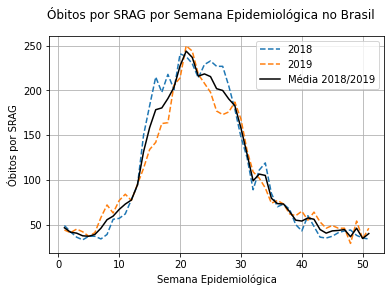

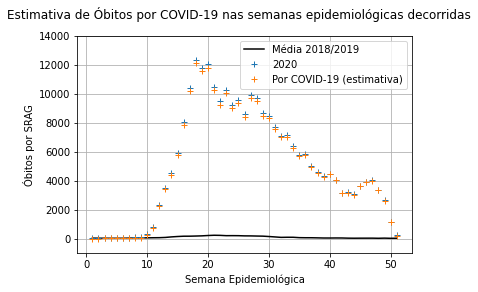

In [37]:

'''
PARTE 2: Estimar mortes causadas por COVID-19(+problemas advindos da pandemia)
a partir dos dados anteriores:
'''

#Obter uma média anual de casos de mortes por SRAG nas semanas epidemiológicas
#dos anos anteriores:
media_2018_2019 = np.zeros(len(semana_epidemiologica))

for i in range(len(semana_epidemiologica)): 
    media_2018_2019[i] = (casos_2018[i] + casos_2019[i])/2.0
    
#gráfico comparativo de 2018, 2019 e média de 2018/2019:
plt.plot(semana_epidemiologica, casos_2018, '--')
plt.plot(semana_epidemiologica, casos_2019, '--')
plt.plot(semana_epidemiologica, media_2018_2019, 'k')

plt.grid(True)

plt.legend(['2018', '2019', 'Média 2018/2019'], loc=1)
plt.ylabel('Óbitos por SRAG')
plt.xlabel('Semana Epidemiológica')
plt.suptitle('Óbitos por SRAG por Semana Epidemiológica no Brasil')

plt.show()      

#Podemos então estimar o número de casos de mortes por COVID-19 subtraindo a
#média dos casos de 2020:

estimativa_2020 = np.zeros(len(casos_2020))
    
for i in range(len(semana_epidemiologica)): 
    estimativa_2020[i] = casos_2020[i] - media_2018_2019[i]

#gráfico comparativo das mortes por covid e das mortes esperadas por SARG:
plt.plot(semana_epidemiologica, media_2018_2019, 'k')
plt.plot(semana_epidemiologica, casos_2020, '+')
plt.plot(semana_epidemiologica, estimativa_2020, '+')

plt.grid(True)
plt.ylim(-1000, 14000)

plt.legend(['Média 2018/2019', '2020', 'Por COVID-19 (estimativa)'], loc=1)
plt.ylabel('Óbitos por SRAG')
plt.xlabel('Semana Epidemiológica')
plt.suptitle('Estimativa de Óbitos por COVID-19 nas semanas epidemiológicas decorridas')

plt.show()   


In [44]:
'''
PARTE 3: Estimar quantos casos de morte por COVID-19 estão subnotificados
'''

#Quantas mortes são esperadas de SRAG por ano? (baseado em nossos dados)
mortes_esperadas_SRAG_ano = sum(media_2018_2019)

print('Mortes decorrentes de SRAG esperadas por ano:', mortes_esperadas_SRAG_ano, '\n')

#Como temos dados da epidemia de COVID-19 em 2020 apenas até a 50ª semana
#epidemiológica, calcularemos os óbitos esperados até este momento:
mortes_esperadas_SRAG_sem50 = 0.0

for i in range(0,50):
    
    mortes_esperadas_SRAG_sem50 += media_2018_2019[i]
    
print('Mortes decorrentes de SRAG até a 50ª semana epidemiológica:', mortes_esperadas_SRAG_sem50, '\n')
    
#mortes de covid até a 18ª semana epidemiológica:
mortes_estimadas_covid_19_sem50 = 0.0
    
for i in range(0,50):
    
    mortes_estimadas_covid_19_sem50 += estimativa_2020[i]
    

print('Estimativa de mortes decorrentes de COVID-19 até a 50ª semana epidemiológica:', mortes_estimadas_covid_19_sem50, '\n')
 
#Segundo os dados obtidos, há, até a 50ª semana epidemiológica, 182110 óbitos
#confirmados por COVID-19 (aproximadamente);

print('Óbitos confirmados por COVID-19 até a 50ª semana epidemiológica: 182110\n')

#logo a estimativa de óbitos que são de SRAG que não foram catalogados como
#COVID-19 são:

print('Estimativa de mortes por COVID-19 que não foram catalogadas como tal:', mortes_estimadas_covid_19_sem50-182110, '\n')

print('Porcentagem de mortes por COVID-19 subnotificadas: ', (70510*100)/252620,'% \n')


Mortes decorrentes de SRAG esperadas por ano: 5376.0 

Mortes decorrentes de SRAG até a 50ª semana epidemiológica: 5336.0 

Estimativa de mortes decorrentes de COVID-19 até a 50ª semana epidemiológica: 252620.0 

Óbitos confirmados por COVID-19 até a 50ª semana epidemiológica: 182110

Estimativa de mortes por COVID-19 que não foram catalogadas como tal: 70510.0 

Porcentagem de mortes por COVID-19 subnotificadas:  27.911487609848784 % 

